# PyRV32 - ALU test


In [1]:
import sys
sys.path.append("../../pyrv32")
sys.path.insert(0, "/home/pyosys/src/myhdl/myhdl-local")

## Arithmetic unit:

In [4]:
from myhdl import *
from myhdl.conversion import yshelper

from arith import t_aluop, alu

def convert(design):
    clk, enable = [ Signal(bool()) for i in range(2)]
    mode = Signal(t_aluop.A_NOP)
    shamt = Signal(intbv()[5:])
    srca, srcb, result = [ Signal(intbv()[32:]) for i in range(3) ]

    inst_alu = alu(clk, enable, mode, srca, srcb, shamt, result)

    inst_alu.convert("yosys_module", design, name="test", trace=True)

#yshelper.DebugOutput.debug = True

design = yshelper.Design("test")
convert(design)

CREATE Module: 'test'
Adding module with name: alu_1_1_4_32_32_5_32
CONVERT_RTL tree >>>>>> 'TEST_WORKER' 
TRUNC: ../../pyrv32/arith.py:14 Implicit carry truncate: result[32:], src[33:]
APPEND OPEN OTHER: ../../pyrv32/arith.py:11 result
DONE instancing submodules


Generating RTL image...
Display...


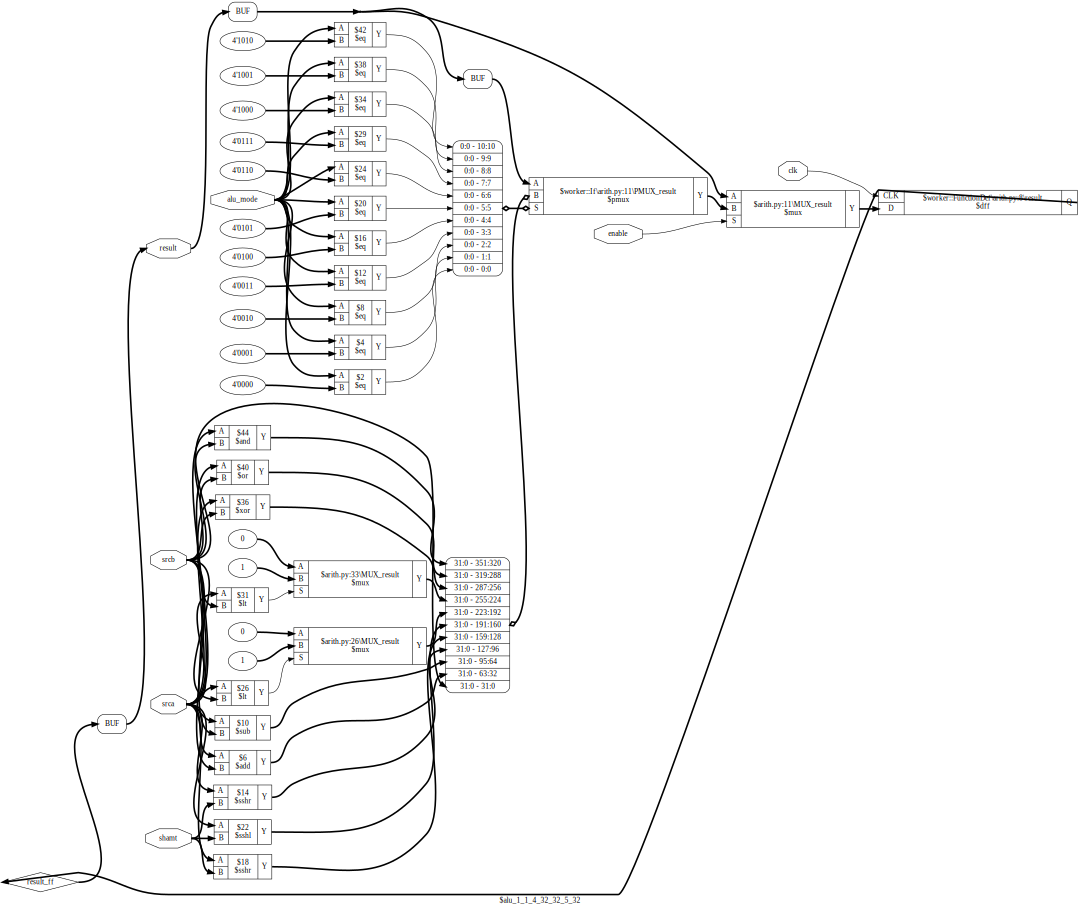

In [5]:
from ys_aux import to_svg
display(to_svg(design, "$alu_1_1_4_32_32_5_32", 150))